# Lab 3 - Distribuições e Testes Estatísticos 

Neste Lab, vamos analisar algumas distribuições na prática e alguns testes estatísticos

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import math

# Importando libs de plots
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('darkgrid')
# sns.set_context('talk')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

## Distribuições

In [ ]:
from scipy.stats import norm

In [ ]:
df = sns.load_dataset('mpg')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Distribuição Normal

$$f(x|\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}}\exp^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

#### Estimadores
$$\hat{\mu} = \bar{X} = \frac{1}{n}\sum_{i=1}^{n} x_i$$
$$\hat{\sigma}^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{X})^2$$

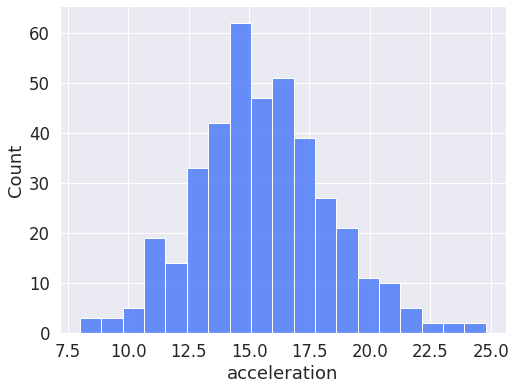

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'acceleration', data = df)
sns.despine()

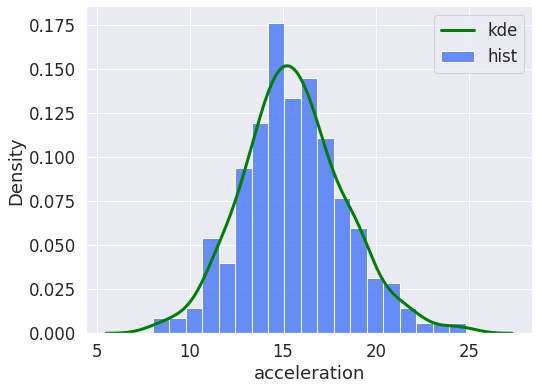

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'acceleration', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'acceleration', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()

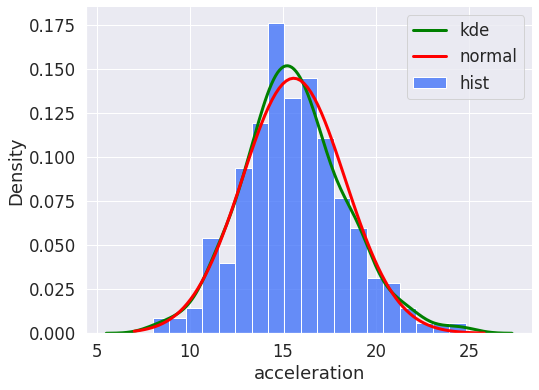

In [ ]:
mu_est = df["acceleration"].mean()
sigma_est = df["acceleration"].std()

fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'acceleration', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'acceleration', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["acceleration"].min() - 1, df["acceleration"].max() + 1, 100)
y=  norm.pdf(x, mu_est, sigma_est)
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="normal")
plt.legend()
sns.despine()


### Gamma

$$
f_{X}(x)= \begin{cases}\frac{\lambda^{\alpha} x^{\alpha-1} e^{-\lambda x}}{\Gamma(\alpha)} & x>0 \\ 0 & \text { otherwise }\end{cases}
$$

#### Estimadores

$$\hat{\alpha} = (\bar{X} / s)^2$$

$$\hat{\lambda} = s^2 / \bar{X}$$

In [ ]:
from scipy.stats import gamma

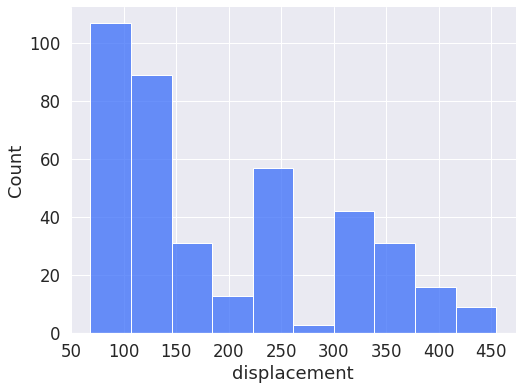

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'displacement', data = df)
sns.despine()

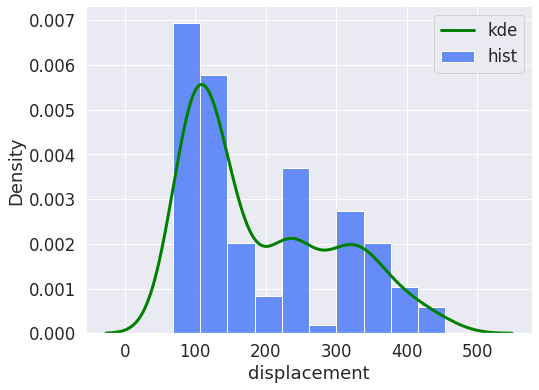

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'displacement', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'displacement', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()

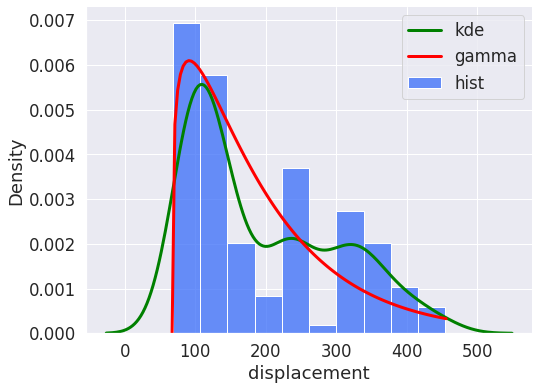

In [ ]:
shape = (df["displacement"].mean() / df["displacement"].std()) ** 2
scale = (df["displacement"].std()**2) / df["displacement"].mean() 
loc = df["displacement"].min()

fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'displacement', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'displacement', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["displacement"].min() - 1, df["displacement"].max() + 1, 100)

shape, loc, scale = gamma.fit(df["displacement"])
y=  gamma.pdf(x, shape, loc, scale)
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="gamma")
plt.legend()
sns.despine()


### Log Normal

$Y \sim LogN(\mu, \sigma^2)$ si $X = ln(Y) \sim N(\mu, \sigma^2)$.

Ou seja, se $X \sim N(\mu, \sigma^2)$, então $Y = \exp(X)$ é uma distribuição log-normal.

In [ ]:
from scipy.stats import lognorm

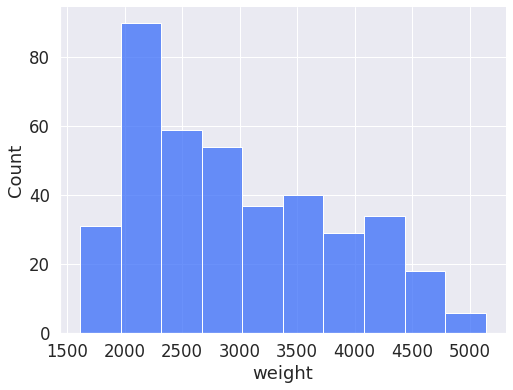

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df)
sns.despine()

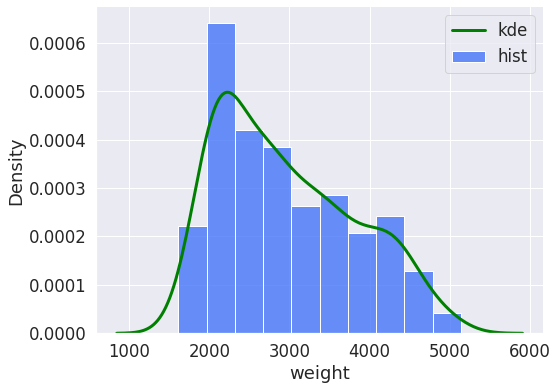

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()

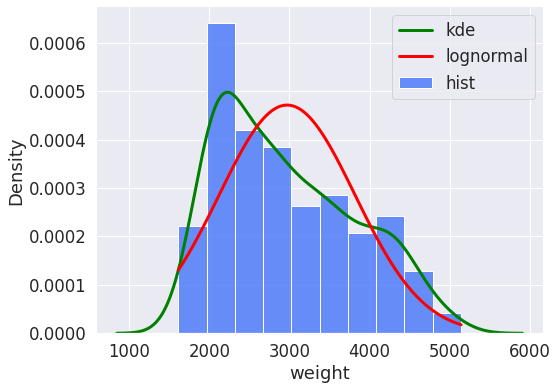

In [ ]:
mu_est = (df["weight"]).mean()
sigma_est = (df["weight"]).std()


fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["weight"].min(), df["weight"].max() + 1, 100)
y=  (norm.pdf(x, mu_est, sigma_est))
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="normal")
plt.legend()
sns.despine()


In [ ]:
df["weight_norm"] = (df["weight"] - df["weight"].mean()) / df["weight"].std() 

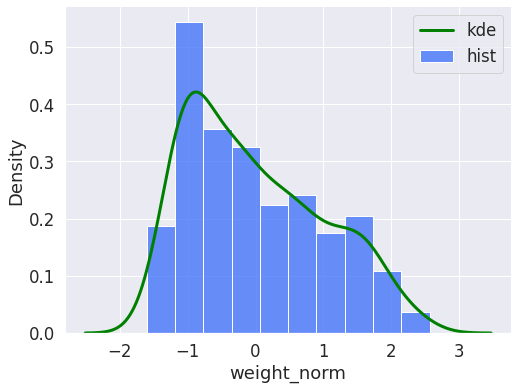

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight_norm', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight_norm', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()


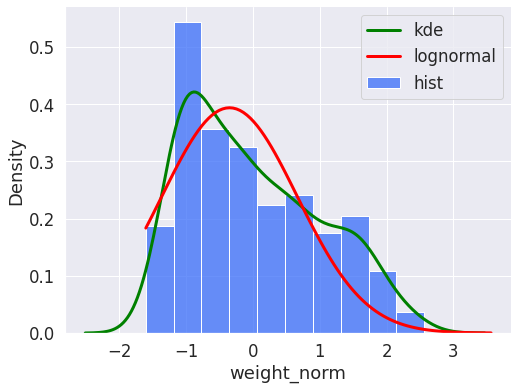

In [ ]:
mu_est = np.log(df["weight_norm"]).mean()
sigma_est = np.log(df["weight_norm"]).std()

fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight_norm', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight_norm', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["weight_norm"].min(), df["weight_norm"].max() + 1, 100)
y=  (norm.pdf(x, mu_est, sigma_est))
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="lognormal")
plt.legend()
sns.despine()


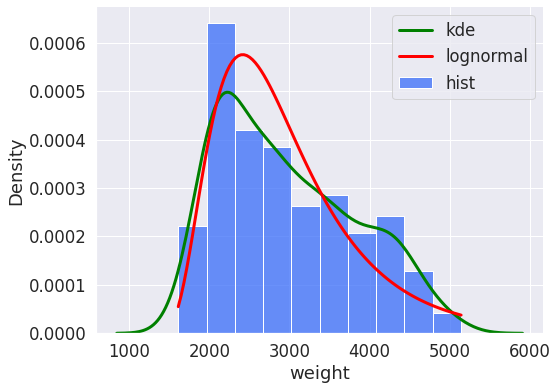

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["weight"].min(), df["weight"].max() + 1, 100)
shape, loc, scale = lognorm.fit(df["weight"])
y=  (lognorm.pdf(x, shape, loc, scale))
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="lognormal")
plt.legend()
sns.despine()


## Testes de Hipóteses
  

$H_0: \mu_{\text{t}} = \mu_{\text{c}}$

$H_a: \mu_{\text{t}} \neq \mu_{\text{c}}$


In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


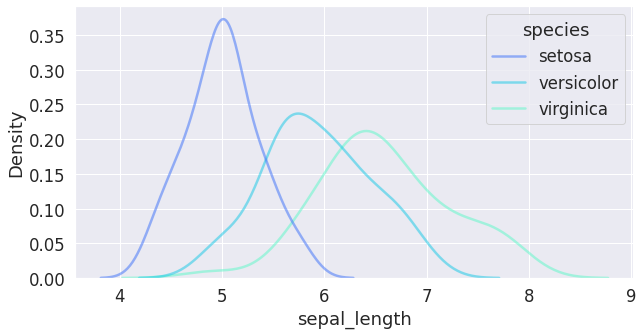

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data=df, x="sepal_length", hue="species", alpha=0.5, ax=ax);

In [33]:
from scipy.stats import t
from scipy.stats import ttest_ind

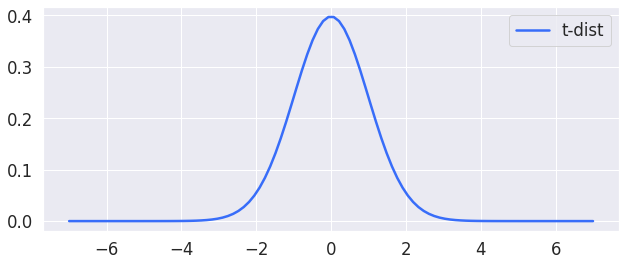

In [ ]:
x_sepal_length = np.linspace(-7, 7, 100)
df_est = len(df.loc[df["species"] == "virginica"]) + len(df.loc[df["species"] == "versicolor"]) - 2

pdf_sepal_length = t.pdf(x_sepal_length, df_est)

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=x_sepal_length, y=pdf_sepal_length, ax=ax, label="t-dist")

fig.tight_layout(pad=3.0)

In [ ]:
from scipy.stats import ttest_ind

t_stat = ttest_ind(
    df.loc[df["species"] == "virginica", "sepal_length"],
    df.loc[df["species"] == "versicolor", "sepal_length"]
)
t_stat

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)

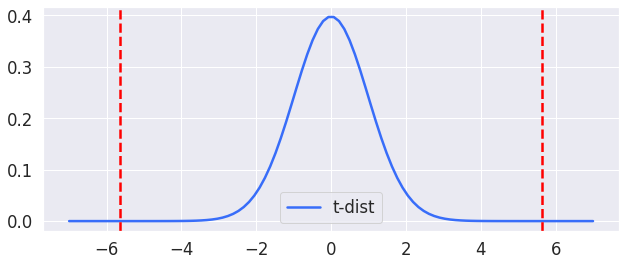

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=x_sepal_length, y=pdf_sepal_length, ax=ax, label="t-dist")
ax.axvline(x=t_stat.statistic, color="red", ls="--")
ax.axvline(x=-t_stat.statistic, color="red", ls="--")

fig.tight_layout(pad=3.0)

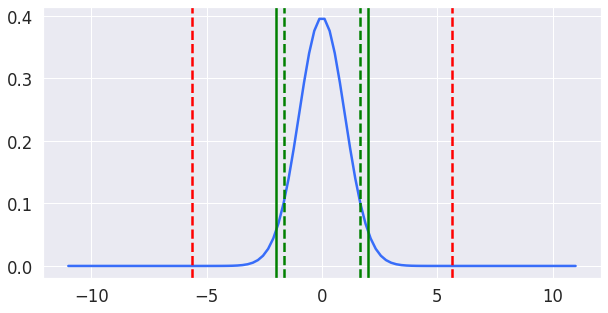

In [ ]:

df_est = len(df.query("species == 'setosa'")) + len(df.query("species == 'versicolor'")) - 2
x = np.linspace(-11, 11, 100)
y = t.pdf(x, df_est)

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x, y, ax = ax)

ax.axvline(x = -t_stat.statistic, color = 'red', ls = '--')
ax.axvline(x = t_stat.statistic, color = 'red', ls = '--')

valor_critico = t.ppf(0.95, df_est)
ax.axvline(x = valor_critico, color = 'green', ls = '--')
ax.axvline(x = -valor_critico, color = 'green', ls = '--')

valor_critico = t.ppf(0.975, df_est)
ax.axvline(x = valor_critico, color = 'green',)
ax.axvline(x = -valor_critico, color = 'green');

In [ ]:
t.ppf(0.975, df_est)

1.984467454426692

In [ ]:
t.ppf(0.05, df_est)

-1.6605512170440575

In [ ]:
p_value = 2*(1-t.cdf(t_stat.statistic, df_est))
p_value

1.7248563022320695e-07

In [ ]:
2*(1-t.cdf(1.98, df_est))


0.050507916068394554

In [ ]:
signif = 0.01

t_critic = t.ppf(1-signif, df=df_est)
print(round(t_critic, 5))

2.365


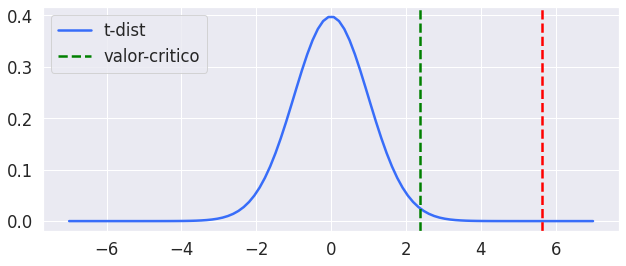

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=x_sepal_length, y=pdf_sepal_length, ax=ax, label="t-dist")
ax.axvline(x=t_stat.statistic, color="red", ls="--")
ax.axvline(x=t_critic, color="green", ls="--", label="valor-critico")
plt.legend()
fig.tight_layout(pad=3.0)

### Calculando o T-test manualmente

Se assumirmos que as distribuições são normais, então calculamos a estatística da seguinte forma: 

$$t = \frac{(\hat{\text{vg}}-\hat{\text{vc}}) - (\mu_{\text{vg}} - \mu_{\text
{vc}})}{\sqrt{\frac{s_{\text{vg}}^2}{n} + \frac{s_{\text{vc}}^2}{m}}}$$

Porém, se simplificarmos o problema e considerar as distribuições como t-student com  $(n+m-2)$ graus de liberdade, então podemos calcular a estatística t com:

$$t = \frac{\hat{\text{vg}}-\hat{\text{vc}}}{\sqrt{\frac{s_{\text{vg}}^2}{n} + \frac{s_{\text{vc}}^2}{m}}}$$


In [39]:
vg = df.query('species == "virginica"')['sepal_length'].mean()
vc = df.query('species == "versicolor"')['sepal_length'].mean()
svg = df.query('species == "virginica"')['sepal_length'].std()
svc = df.query('species == "versicolor"')['sepal_length'].std()
n = len(df.query('species == "virginica"')['sepal_length'])
m = len(df.query('species == "versicolor"')['sepal_length'])

statistic = (vg - vc)/np.sqrt(((svg**2)/n) + ((svc**2)/m))

print(f"""
statistic: {statistic}
p-value (t-student): {2 * (1 - t.cdf(statistic, df = n + m - 2))}
""")


statistic: 5.629165259719801
p-value (t-student): 1.7248563022320695e-07



### Calculando teste para verificar diferença de proporções


$$ Z = \frac{\hat{p_1} - \hat{p_2}}{\sqrt{p(1 - p)(\frac{1}{n_1} + \frac{1}{n_2})}}$$



- queremos ver no dataset abaixo se a proporção de pessoas com score 6 com foco é diferente de pessoas com atenção dividida


In [ ]:
df = sns.load_dataset('attention')
df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


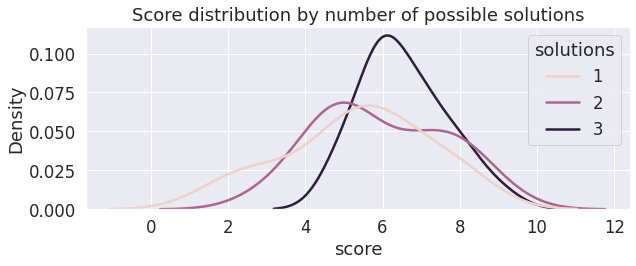

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Score distribution by number of possible solutions")
sns.kdeplot(data=df[df["solutions"].isin([1, 2, 3])], x="score", hue="solutions", ax=ax)

fig.tight_layout(pad=3.0)

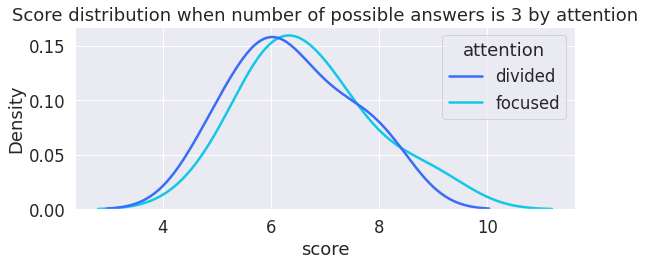

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Score distribution when number of possible answers is 3 by attention")
sns.kdeplot(data=df[df["solutions"].isin([3])], x="score", hue="attention", ax=ax)

fig.tight_layout(pad=3.0)

In [ ]:
df["approved"] = (df["score"] >= 6).astype("int")
df.tail()

,Unnamed: 0,subject,attention,solutions,score,approved
55,55,16,focused,3,7.0,1
56,56,17,focused,3,6.0,1
57,57,18,focused,3,6.0,1
58,58,19,focused,3,6.0,1
59,59,20,focused,3,5.0,0


In [ ]:
attention_3_solutions = df[df["solutions"] == 3]

p1 = attention_3_solutions[attention_3_solutions["attention"] == "focused"]["approved"].mean()
p2 = attention_3_solutions[attention_3_solutions["attention"] == "divided"]["approved"].mean()
p = attention_3_solutions["approved"].mean()
n1 = len(attention_3_solutions[attention_3_solutions["attention"] == "focused"])
n2 = len(attention_3_solutions[attention_3_solutions["attention"] == "divided"])

statistic = (p1-p2)/np.sqrt(p*(1-p)*(1/n1+1/n2))
dfn = n1 + n2 - 2

from scipy.stats import t
from scipy.stats import norm

print(f"""
statistic: {statistic}
p-value (t-student): {1 - t.cdf(statistic, df = dfn)}
p-value (normal): {1 - norm.cdf(statistic)}
""")


statistic: 0.6262242910851493
p-value (t-student): 0.26951439315489223
p-value (normal): 0.2655839182730071



### Kolmogorov-Smirnov

- é um teste não-parámetrico, i.e., não assume as distribuições dos dados 
- compara diferença entre CDFs empíricas de distribuições para se checar se as duas amostras vieram ou não de uma mesma distribuição

In [2]:
df = sns.load_dataset('iris')

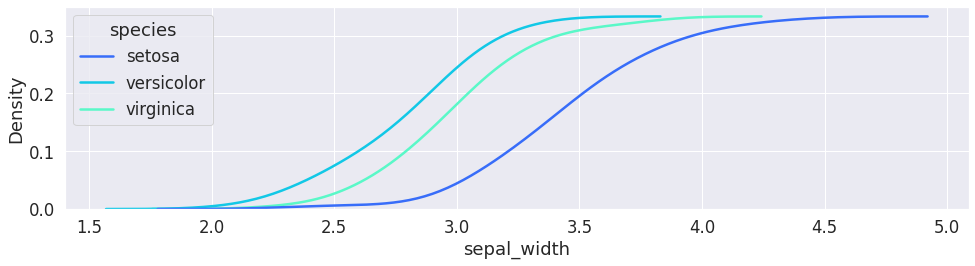

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.kdeplot(data = df, x = 'sepal_width', cumulative = True, ax = ax, hue = 'species')
fig.tight_layout(pad=3.0);

In [4]:
df["modified_sepal_width"] = np.where(
    df["species"] == "virginica",
    df["sepal_width"] + 0.5,
    df["sepal_width"]
)

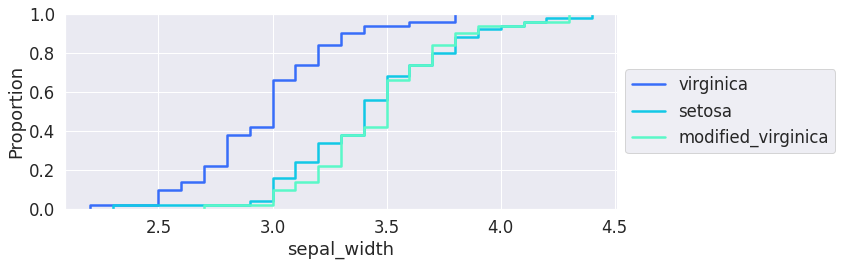

In [18]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.ecdfplot(data = df.query('species == "virginica"'), x = 'sepal_width', ax = ax, label = 'virginica')
sns.ecdfplot(data = df.query('species == "setosa"'), x = 'sepal_width', ax = ax, label = 'setosa')
sns.ecdfplot(data = df.query('species == "virginica"'), x = 'modified_sepal_width', ax = ax, label = 'modified_virginica')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout(pad=3.0)

Vamos testar se modified_virgnica e setosa vieram de uma mesma distribuição. Vamos estabelecer uma significância de 5% 

In [19]:
def ecdf(n_percentiles, y, bounds=None):

  if bounds is None:
    min_bound = min(y)
    max_bound = max(y)
  else:
    min_bound = bounds[0]
    max_bound = bounds[1]

  percentiles = np.linspace(min_bound, max_bound, n_percentiles+1)
  ecdfs = []
  n = len(y)

  for p in percentiles:
    len_obs = sum(y <= p)
    ecdfs.append(len_obs / n)

  return ecdfs, percentiles

In [20]:
bounds = (2.5, 5.0)

virginica_ecdf, percentiles = ecdf(25, df[df["species"] == "virginica"]["modified_sepal_width"], bounds)
setosa_ecdf, _ = ecdf(25, df[df["species"] == "setosa"]["modified_sepal_width"], bounds)

diff_ecdf = np.array(setosa_ecdf) - np.array(virginica_ecdf)

approx_ks_stat = max(abs(diff_ecdf))

In [21]:
approx_ks_stat

0.14000000000000007

Approximate K-S statistic: 0.14


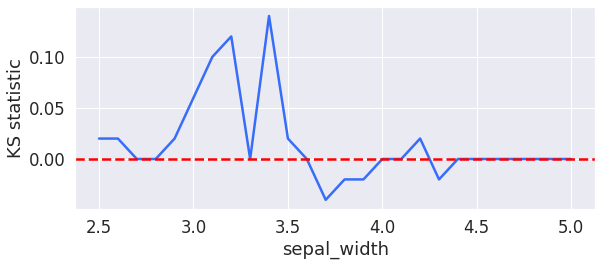

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

print(f"Approximate K-S statistic: {round(approx_ks_stat, 5)}")

sns.lineplot(x=percentiles, y=diff_ecdf, ax=ax)
ax.axhline(y=0, color="red", ls="--")
plt.xlabel('sepal_width')
plt.ylabel('KS statistic')

fig.tight_layout(pad=3.0)

In [26]:
from scipy.stats import ks_2samp

ks_stat, p_value = ks_2samp(
    data1=df[df["species"] == "virginica"]["modified_sepal_width"],
    data2=df[df["species"] == "setosa"]["modified_sepal_width"]
)

print(f"""
Real KS stat: {ks_stat} (vs. approximate KS stat: {round(approx_ks_stat, 5)})
p-value: {round(p_value, 5)}
""")


Real KS stat: 0.14 (vs. approximate KS stat: 0.14)
p-value: 0.71665



## Outros testes: 
* Normalidade:
  * Shapiro 
  * Jaque-Bera
  * Anderson-Darling
  * Lilliefors

### Bootstrapping


#### Teorema do Limite Central

$X_i$ con $i=1,...,n$

Sendo $\mu = E[X_i], \forall i$ y $\sigma^2 = \text{Var}[X_i], \forall i$, então

$$S = \sum_i^n \frac{X_i - \mu}{\sigma / \sqrt{n}} \sim N(0, 1)$$

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(np.random.normal(0,1,500))

ShapiroResult(statistic=0.9980269074440002, pvalue=0.8377613425254822)

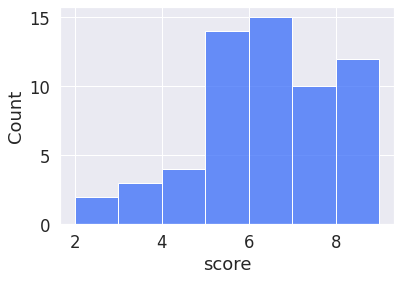

In [ ]:
sns.histplot(df['score']);

In [ ]:
shapiro(df['score'])

ShapiroResult(statistic=0.9490798711776733, pvalue=0.014101840555667877)

In [ ]:
means = []
for i in range(1000):
  means.append(df.sample(frac = 0.8, replace = True)['score'].mean())

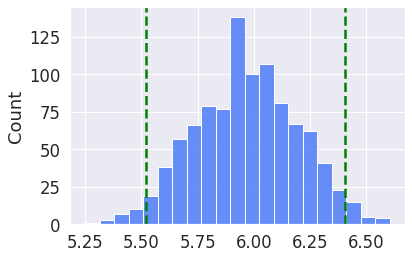

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

sns.histplot(means);

ax.axvline(x = np.quantile(means, 0.025), color = 'green', ls = '--')
ax.axvline(x = np.quantile(means, 0.975), color = 'green', ls = '--');

In [ ]:
shapiro(means)

ShapiroResult(statistic=0.9975476264953613, pvalue=0.14006656408309937)

### Testes Estatísticos com Bootstrapping